# Test Quant Dataset Creation
---

**Imports**

In [1]:
from src.libs.project_libs import *

/home/franec94/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/franec94/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_

### Global Variables
---

In [2]:
ROOT_DIR = "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/cameramen_1"
OUT_DIR = "./out/results"
CONF_FILEPATH = "./confs/cameramen/conf_cameramen_init_from_pruned.yaml"
TESTS_LOGGING_ROOTS = "./logs"
OUTPUT_DATASET_PATH = "./out/datasets"
PERFORMANCES_PATH = "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/performances.txt"
OUT_FILENAME = "out.csv"

In [3]:
conf_data_dict = dict(
    root_dir=ROOT_DIR,
    out_dir=OUT_DIR,
    conf_filepath=CONF_FILEPATH,
    tests_logging_root=TESTS_LOGGING_ROOTS,
    output_dataset_path=OUTPUT_DATASET_PATH,
    performances_path=PERFORMANCES_PATH
)
# pprint(conf_data_dict)
meta_data_table = dict(
    tabular_data=conf_data_dict.items()
)
table_conf_data = tabulate.tabulate(**meta_data_table)
# print(table_conf_data)

In [4]:
parser = cpqd.get_custom_parser_for_notebook(conf_data_dict=conf_data_dict)
args, _  = parser.parse_known_args()
# pprint(args)
meta_data_table = dict(
    tabular_data=vars(args).items()
)
table_conf_data = tabulate.tabulate(**meta_data_table)
# print(table_conf_data)

### Setup Notebook for storing results
---


In [5]:
conf_data: dict = read_conf_file(conf_file_path=args.conf_filepath)
# print(conf_data)

In [6]:
sscqd.check_command_line_args(args=args)

In [7]:
a_run_ts = 1614333442.0503435 # time.time()
sscqd.create_out_dir(args=args, a_run_ts=a_run_ts, raise_exception=False)


Exception: [Errno 17] File exists: './out/results/res_out_1614333442.0503435' managed.


### Create Dataset for Quantized Trials
---

In [8]:
a_df = cqd.create_out_dataset(args=args, conf_data=conf_data, out_filename=OUT_FILENAME)

In [9]:
merged_df = merge_performace_w_models_data(args=args, models_df=a_df)

a_df_path = os.path.join(args.out_dir, f"merged_out.csv")
merged_df.to_csv(a_df_path)

In [10]:
quant_df = copy.deepcopy(merged_df)

In [11]:
ROOT_DIRS = [
    "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/cameramen_1",
    "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/cameramen_2"
]

In [12]:
dfs_list: list = []
for ii, ROOT_DIR in enumerate(ROOT_DIRS):
    try:
        conf_data_dict = dict(
            root_dir=ROOT_DIR,
            out_dir=OUT_DIR,
            conf_filepath=CONF_FILEPATH,
            tests_logging_root=TESTS_LOGGING_ROOTS,
            output_dataset_path=OUTPUT_DATASET_PATH,
            performances_path=PERFORMANCES_PATH
        )
        parser = cpqd.get_custom_parser_for_notebook(conf_data_dict=conf_data_dict)
        args, _  = parser.parse_known_args()
        a_df = cqd.create_out_dataset(args=args, conf_data=conf_data, out_filename=OUT_FILENAME)
        merged_df = merge_performace_w_models_data(args=args, models_df=a_df)
        dfs_list.append(copy.deepcopy(merged_df))
    except Exception as err:
        print("[*] Error occuring for:")
        print(f"\t{ii} - {ROOT_DIR}")
        print(f"\tError: {str(err)}")
        pass
    pass

In [13]:
quant_df = pd.concat(dfs_list, axis = 0, ignore_index=True)

In [14]:
quant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   experiment_date    54 non-null     object 
 1   date_train         54 non-null     object 
 2   date_test          54 non-null     object 
 3   init_from          54 non-null     object 
 4   root_dir           54 non-null     object 
 5   model_name         54 non-null     object 
 6   size_byte          54 non-null     object 
 7   footprint          54 non-null     object 
 8   psnr               54 non-null     object 
 9   bpp                54 non-null     float64
 10  CR                 54 non-null     object 
 11  mse                54 non-null     object 
 12  ssim               54 non-null     object 
 13  time               54 non-null     object 
 14  entropy            54 non-null     object 
 15  scheduler_name     54 non-null     object 
 16  scheduler          54 non-nu

In [15]:
quant_df.describe()

,bpp,prune_rate,num_epochs,n_hf,n_hl,w,h,L1,L2,lr,size_byte_th,nbits
count,54.000000,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.000000,54.000000,54.000000
mean,3.142433,25.0,500025.0,64.0,5.0,256.0,256.0,0.0,0.0,0.000075,25742.812500,12.500000
std,0.817072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000021,6693.453537,3.532865
min,2.332962,25.0,500025.0,64.0,5.0,256.0,256.0,0.0,0.0,0.000050,19111.625000,9.000000
25%,2.332962,25.0,500025.0,64.0,5.0,256.0,256.0,0.0,0.0,0.000050,19111.625000,9.000000
50%,3.142433,25.0,500025.0,64.0,5.0,256.0,256.0,0.0,0.0,0.000075,25742.812500,12.500000
75%,3.951904,25.0,500025.0,64.0,5.0,256.0,256.0,0.0,0.0,0.000100,32374.000000,16.000000
max,3.951904,25.0,500025.0,64.0,5.0,256.0,256.0,0.0,0.0,0.000100,32374.000000,16.000000


### Fetch Other Datasets
---

**Fetch Pruned Dataset**

In [16]:
# date = "___2021.02.22-174841"
image_name = conf_data["input_data"]["image_name"]
pruned_df = dataset_loaders.load_prunining_dataset(dtype="dataframe", image_name=f"{image_name}")

In [17]:
date_attr: str = "date_train"
if date_attr not in pruned_df.columns:
    date_attr = "date"
    pass
pruned_df[f"{date_attr}"].unique()

array(['2020.12.10-044629', '2020.12.09-085652', '2020.12.08-191157',
       '2020.12.07-045630', '2020.12.11-171610', '2020.12.12-190415',
       '2020.12.13-232457', '2020.12.14-174343', '2020.12.15-173411',
       '2020.12.14-102807'], dtype=object)

In [18]:
date = conf_data["init_from"]["date"]
date

'2020.12.15-173411'

In [19]:
date in pruned_df[f"{date_attr}"].unique()

True

In [20]:
# date = "___2021.02.22-174841"
date = conf_data["init_from"]["date"]
date_attr: str = "date_train"
if date_attr not in pruned_df.columns:
    date_attr = "date"
    pass
pos =  pruned_df[f"{date_attr}"] == date
a_row = pruned_df[pos].head(1)

data = pruned_df[pos].head(1).values[0]
cols = list(pruned_df.columns)

a_tmp_dict = dict(zip(cols, data))
meta_data_table = dict(
    tabular_data=a_tmp_dict.items()
)
table_conf_data = tabulate.tabulate(**meta_data_table)
# print(table_conf_data)

In [21]:
pruned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 401 to 426
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  26 non-null     object 
 1   init-from             26 non-null     object 
 2   size(byte)            26 non-null     float64
 3   footprint(%)          26 non-null     float64
 4   psnr                  26 non-null     float64
 5   bpp                   26 non-null     float64
 6   CR                    26 non-null     float64
 7   mse                   26 non-null     float64
 8   ssim                  26 non-null     float64
 9   cmprss-class          26 non-null     object 
 10  cmprss-class-2        26 non-null     object 
 11  cmprss-class-3        26 non-null     object 
 12  prune_rate_intervals  26 non-null     object 
dtypes: float64(7), object(6)
memory usage: 2.8+ KB


In [22]:
pruned_df.head(5)

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals
401,2020.12.10-044629,2020.11.29-231149,52040.0,61.967135,45.815070,6.352539,0.610108,0.000105,0.989299,AGP:38,AGP,AGP,35-40
402,2020.12.10-044629,2020.11.29-231149,52036.0,61.962372,45.284305,6.352051,0.610155,0.000119,0.988715,AGP:38,AGP,AGP,35-40
403,2020.12.09-085652,2020.11.29-231149,56952.0,67.816147,44.789306,6.952148,0.557487,0.000133,0.990356,AGP:32,AGP,AGP,30-35
404,2020.12.08-191157,2020.11.29-231149,56952.0,67.816147,45.153248,6.952148,0.557487,0.000122,0.990075,AGP:32,AGP,AGP,30-35
405,2020.12.07-045630,2020.11.29-231149,57780.0,68.802096,45.418737,7.053223,0.549498,0.000115,0.990626,AGP:31,AGP,AGP,30-35


In [23]:
pruned_df.describe()

,size(byte),footprint(%),psnr,bpp,CR,mse,ssim
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,59293.384615,70.604173,45.434959,7.237962,0.539960,0.000114,0.951807
std,5534.258216,6.589972,0.984659,0.675569,0.050144,0.000034,0.194135
min,52036.000000,61.962372,43.733041,6.352051,0.470789,0.000000,0.000000
25%,55029.000000,65.526316,44.920196,6.717407,0.501627,0.000105,0.988726
50%,58878.000000,70.109550,45.330843,7.187256,0.539263,0.000117,0.989594
75%,63294.000000,75.367945,45.808003,7.726318,0.576969,0.000129,0.990751
max,67440.000000,80.304834,47.872620,8.232422,0.610155,0.000169,0.992671


**Fetch Jpeg Dataset**

In [24]:
image_name = conf_data["input_data"]["image_name"]
jpeg_df = dataset_loaders.load_jpeg_dataset(dtype="dataframe", image_name=f"{image_name}")
jpeg_df.head(1)

,Unnamed: 0,mse,psnr,ssim,quality,size_byte,bpp,width,height,CR,image_name,cmprss-class,cmprss-class-2,cmprss-class-3,prune_techs,prune_rate,quant_tech,nbits
0,0,30.618301,33.270993,0.939424,20,4133.0,0.504517,256,256,7.682071,cameramen,Jpeg:20.00,Jpeg,Jpeg,Jpeg,NaN,Jpeg,32


In [25]:
jpeg_test066_df = dataset_loaders.load_jpeg_dataset(dtype="dataframe", image_name=f"{image_name}")

### Create Some Plots
---

In [26]:
def show_jpeg_df(jpeg_df=pd.DataFrame(), ax=None, **kwargs) -> None:
    if jpeg_df.shape[0] == 0 or ax is None: return
    colors = "orange,blue".split(",")
    image_names = "cameramen,test066".split(",")
    markers_list = "x,x,".split(",")
    marker_name_dict = dict(zip(image_names, markers_list))
    colors_name_dict = dict(zip(image_names, colors))
    for ii, (gk, gdata) in enumerate(jpeg_df.groupby(by=["image_name"])):
        if gk not in image_names: continue
        x, y = gdata["bpp"].values, gdata["psnr"].values
        marker = marker_name_dict[gk]
        color = colors_name_dict[gk]
        # plt.scatter(x, y, marker=marker, s=100, label=f"{gk}(Jpeg)", color=color, edgecolors="black")
        plt.scatter(x, y, marker="o", s=100, label=f"{gk}(Jpeg)", color="white", edgecolors="blue")
        pass
    pass

def show_prune_df(prune_df=pd.DataFrame(), ax=None, *kwargs) -> None:
    if prune_df.shape[0] == 0 or ax is None: return

    colors = "orange,blue".split(",")
    image_names = "cameramen,test066".split(",")
    markers_list = "+,+,".split(",")
    marker_name_dict = dict(zip(image_names, markers_list))

    colors_name_dict = dict(zip(image_names, colors))
    for gk, gdata in prune_df.groupby(by=["image_name_2"]):
        x, y = gdata["bpp"].values, gdata["psnr"].values
        kf = None
        for k in image_names:
            if k in gk:
                kf = k
                break
        if not kf: continue
        marker = marker_name_dict[kf]
        color = colors_name_dict[kf]
        x, y = gdata["bpp"].values, gdata["psnr"].values
        # plt.scatter(x, y, marker=marker, s=100, label=gk, color=color, edgecolors="black")
        # plt.scatter(x, y, marker=marker, s=100, label=gk, color="green", edgecolors="black")
        plt.scatter(x, y, marker="o", s=100, label=gk, color="white", edgecolors="green")
        pass
    pass


def show_quant_df(quant_df=pd.DataFrame(), ax=None, *kwargs) -> None:
    if quant_df.shape[0] == 0 or ax is None: return
    for gk, gdata in quant_df.groupby(by=["quant_techs_2", "nbits"]):
        tech, nbits = gk
        if nbits == 5: continue
        gdata = gdata.sort_values(by=["psnr"], ascending=False)
        x, y = gdata["bpp"].values[0:10], gdata["psnr"].values[0:10]
        label = f"{gk[0]}({gk[1]})"
        plt.scatter(x, y, s=100, marker="D", label=label, edgecolors="black")
        pass
    pass

def show_baseline_df(a_df=pd.DataFrame(), thsd_list:list = [], ax=None, *kwargs) -> None:
    if a_df.shape[0] == 0 or ax is None: return
    
    if thsd_list != []:
        pos = a_df["psnr"] <= thsd_list[0]
        tmp_df = a_df[pos]
        x, y = tmp_df["bpp"].values[0:], tmp_df["psnr"].values[0:]
        ax.scatter(
            x, y, label="BL-U.P.", color="white", edgecolors="red", marker="o"
        )

        pos = (a_df["psnr"] >= thsd_list[0]) & (a_df["bpp"] <= thsd_list[1])
        tmp_df = a_df[pos]
        x, y = tmp_df["bpp"].values[0:], tmp_df["psnr"].values[0:]
        ax.scatter(
            x, y, label="BL-M.", color="white", edgecolors="green", marker="o"
        )

        pos = a_df["bpp"] >= thsd_list[1]
        tmp_df = a_df[pos]
        x, y = tmp_df["bpp"].values[0:], tmp_df["psnr"].values[0:]
        ax.scatter(
            # x, y, label="BL-O.P.", color="white", edgecolors="orange", marker="o"
            x, y, label="BL-O.P.", color="white", edgecolors="black", marker="o"
        )
    else:
        x, y = a_df["bpp"].values[0:], a_df["psnr"].values[0:]
        ax.scatter(
            x, y, label="baseline", color="white", edgecolors="black", marker="o"
        )
    pass

In [27]:
def add_jpeg_fixed_points(jpeg_df=pd.DataFrame(), image_name=None, qualities=[], ax=None, bpp_flag: bool = False, **kwargs) -> None:
    """Add fixed data points to a given input image."""

    if jpeg_df.shape[0] == 0 or not ax: return

    tmp_jpeg_image_df = jpeg_df[jpeg_df["image_name"] == image_name]
    if tmp_jpeg_image_df.shape[0] == 0: return

    if "horizontalalignment" not in kwargs.keys():
        kwargs["horizontalalignment"] = "center"

    pos = tmp_jpeg_image_df["bpp"] <= 1.0
    a_row = tmp_jpeg_image_df[pos].sort_values(by = ["psnr"], ascending=False).head(1)
    if a_row.shape[0] != 0:
        pnsr = a_row["psnr"].values[0]
        bpp = a_row["bpp"].values[0]
        a_quality = a_row["quality"].values[0]

        x, y = bpp, pnsr
        if bpp_flag:
            ax.scatter(x, y, marker='D', color="yellow", s=150, edgecolors='black')
            ax.scatter(x, y, marker='.', color="red", edgecolors='black')
            # msg: str = f"JPG:{a_quality}%->({x:.2f},{y:.2f})"
            msg: str = f"JPG:{a_quality}%\n({x:.2f},{y:.2f})"
            ax.text(x=x, y=y, s = msg,
                horizontalalignment=kwargs["horizontalalignment"],
                fontdict={'fontsize': 14, 'fontweight': 'bold'})
            pass
        xmin, xmax = ax.get_xlim()
        ax.hlines(y = y, xmin=xmin, xmax=xmax, linestyle="--",  alpha=0.5)
        ax.text(y = y+0.5, x=xmax, s=f"[{image_name}]Jpeg({a_quality:.2f}%)",
            horizontalalignment="right",
            fontdict={'fontsize': 12, 'fontweight': 'bold'})
        pass

    for a_quality in qualities:
        a_row = tmp_jpeg_image_df[tmp_jpeg_image_df["quality"] == a_quality].head(1)
        if a_row.shape[0] == 0: continue
        pnsr = a_row["psnr"].values[0]
        bpp = a_row["bpp"].values[0]

        x, y = bpp, pnsr
        ax.scatter(x, y, marker='D', color="yellow", s=150, edgecolors='black')
        ax.scatter(x, y, marker='.', color="red", edgecolors='black')
        # msg: str = f"JPG:{a_quality}%->({x:.2f},{y:.2f})"
        msg: str = f"JPG:{a_quality}%\n({x:.2f},{y:.2f})"
        ax.text(x=x, y=y, s = msg,
            horizontalalignment=kwargs["horizontalalignment"],
            fontdict={'fontsize': 14, 'fontweight': 'bold'})
        pass
    pass

In [28]:
def add_fixed_qat_points(a_df, ax, on_a_line_msg: bool = False, **kwargs):
    if a_df.shape[0] == 0 or not ax: return

    if "horizontalalignment" not in kwargs.keys():
        kwargs["horizontalalignment"] = "center"
        pass

    for gk, gdata in a_df.groupby(by=["quant_techs_2", "nbits"]):
        tech, nbits = gk
        if nbits == 5: continue
        gdata_sorted = gdata.sort_values(by=["psnr"], ascending=False)
        a_row = gdata_sorted.head(1)
        psnr_val = a_row["psnr"].values[0]
        bpp = a_row["bpp"].values[0]

        x, y = bpp, psnr_val
        ax.scatter(x, y, marker='D', color="yellow", edgecolors='black')
        ax.scatter(x, y, marker='.', color="red", edgecolors='black')
        if on_a_line_msg:
            msg: str = f"LRQ:{nbits:.0f}bits - ({bpp:.2f},{psnr_val:.2f})"
        else:
            msg: str = f"LRQ:{nbits:.0f}bits\n({bpp:.2f},{psnr_val:.2f})"
            pass
        ax.text(x=x, y=y, s = msg,
            horizontalalignment=kwargs["horizontalalignment"],
            fontdict={'fontsize': 14, 'fontweight': 'bold'})
        pass
    pass

In [29]:
def add_fixed_prune_points(a_df, ax, **kwargs):
    """Add fixed data points to a given input image."""

    if a_df.shape[0] == 0 or not ax: return

    if "horizontalalignment" not in kwargs.keys():
        kwargs["horizontalalignment"] = "center"
        pass

    for gk, gdata in a_df.groupby(by=["image_name_2"]):
        gdata_sorted = gdata.sort_values(by=["psnr"], ascending=False)
        
        a_row = gdata_sorted.head(1)
        psnr_val = a_row["psnr"].values[0]
        bpp = a_row["bpp"].values[0]
        prune_rate = a_row["prune_rate"].values[0]

        x, y = bpp, psnr_val
        ax.scatter(x, y, marker='D', color="yellow", edgecolors='black', s=100)
        ax.scatter(x, y, marker='.', color="red", edgecolors='black')
        ax.text(x=x, y=y, s = f"{gk[0:]}:{prune_rate*100:.2f}%\n({bpp:.2f},{psnr_val:.2f})",
            horizontalalignment=kwargs["horizontalalignment"],
            fontdict={'fontsize': 12, 'fontweight': 'bold'})

        a_row = gdata_sorted.tail(1)
        psnr_val = a_row["psnr"].values[0]
        bpp = a_row["bpp"].values[0]
        prune_rate = a_row["prune_rate"].values[0]

        x, y = bpp, psnr_val
        ax.scatter(x, y, marker='D', color="yellow", edgecolors='black', s=100)
        ax.scatter(x, y, marker='.', color="red", edgecolors='black')
        ax.text(x=x, y=y, s = f"{gk[0:]}:{prune_rate*100:.2f}%\n({bpp:.2f},{psnr_val:.2f})",
            horizontalalignment=kwargs["horizontalalignment"],
            fontdict={'fontsize': 12, 'fontweight': 'bold'})

        pass

In [30]:
def show_models_choices(a_df, ax, **kwargs):
    """Show models choices."""

    if a_df.shape[0] == 0 or not ax: return

    if "horizontalalignment" not in kwargs.keys():
        kwargs["horizontalalignment"] = "center"
        pass

    x, y = a_df["bpp"].values, a_df["psnr"].values
    plt.scatter(x, y, marker="^", s=200, label=f"Choices", color="red", edgecolors="black")

    cols = list(a_df.columns)
    for vals in a_df.values:
        
        vals_dict = dict(zip(cols, vals))
        
        bpp, psnr_val = vals_dict["bpp"], vals_dict["psnr"]
        x, y = vals_dict["bpp"], vals_dict["psnr"]
        prune_rate = vals_dict["prune_rate"]
        if str(prune_rate) != "-":
            prune_techs = vals_dict["prune_techs"]
            prune_techs = list(filter(lambda item: item.upper() == item or item == "+", prune_techs))
            prune_techs = ''.join(prune_techs)
            msg = f"Choice:\n{prune_techs}-{prune_rate*100:.2f}%\n({bpp:.2f},{psnr_val:.2f})"
            pass
        else:
            msg = f"Choice:\n({bpp:.2f},{psnr_val:.2f})"

        ax.text(x=x, y=y, s = msg,
            horizontalalignment=kwargs["horizontalalignment"],
            fontdict={'fontsize': 12, 'fontweight': 'bold'})
        pass
    pass

In [31]:
def show_data_from_datasets(
    jpeg_df = pd.DataFrame(), prune_df = pd.DataFrame(), quant_df = pd.DataFrame(),
    model_choices = pd.DataFrame(), baseline_df = pd.DataFrame(),
    image_names:list = [], qualities: list = [20, 68, 95]) -> object:

    fig, ax = plt.subplots(1, 1, figsize=(20, 20))

    show_baseline_df(a_df=baseline_df, ax=ax)
    
    show_jpeg_df(jpeg_df=jpeg_df, ax=ax)
    show_prune_df(prune_df=prune_df, ax=ax)
    show_quant_df(quant_df=quant_df, ax=ax)
    show_models_choices(a_df=model_choices, ax=ax)

    for image_name in image_names:
        add_jpeg_fixed_points(
            jpeg_df=jpeg_df, image_name=image_name,
            qualities=qualities, ax=ax, horizontalalignment="right")

    add_fixed_qat_points(a_df=quant_df, ax=ax, horizontalalignment="right")
    add_fixed_prune_points(a_df=prune_df, ax=ax, horizontalalignment="left")

    ymin, ymax = ax.get_ylim()
    ax.vlines(ymin=ymin, ymax=ymax, x = 8, linestyle="--", alpha=0.5)
    ax.text(y = ymax, x = 8, s="Image Info: 8-bpp", fontdict={'fontsize': 12, 'fontweight': 'bold'})

    ax.set_title(f"Psnr vs Bpp ", fontdict={'fontsize': 20, 'fontweight': 'bold'})

    ax.set_xlabel("Bpp", fontweight="bold")
    ax.set_ylabel("Pnsr [db]", fontweight="bold")
    plt.legend(title="JPG/BSLN/PRUNE/QUANT", loc='lower right',)
    plt.show()
    return fig, ax

In [32]:
image_name = conf_data["input_data"]["image_name"]
pruned_df["image_name"] = [image_name] * pruned_df.shape[0]
pruned_df["image_name_2"] = [f"{image_name}-AGP"] * pruned_df.shape[0]

str_2_float = lambda item: float(str(item)) if str(item) != "-" else 0
try:
    vals = pruned_df["psnr"].values
    pruned_df["psnr"] = list(map(str_2_float, vals))
except Exception as err:
    print(err)
    pass
try:
    pruned_df["bpp"] = pruned_df["size_byte_th"].values * 8 / (256 * 256)
except Exception as err:
    print(err)
    pass

pruned_df[["psnr", "bpp"]].head(5)

'size_byte_th'


,psnr,bpp
401,45.815070,6.352539
402,45.284305,6.352051
403,44.789306,6.952148
404,45.153248,6.952148
405,45.418737,7.053223


In [33]:
pruned_df.describe()

,size(byte),footprint(%),psnr,bpp,CR,mse,ssim
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,59293.384615,70.604173,45.434959,7.237962,0.539960,0.000114,0.951807
std,5534.258216,6.589972,0.984659,0.675569,0.050144,0.000034,0.194135
min,52036.000000,61.962372,43.733041,6.352051,0.470789,0.000000,0.000000
25%,55029.000000,65.526316,44.920196,6.717407,0.501627,0.000105,0.988726
50%,58878.000000,70.109550,45.330843,7.187256,0.539263,0.000117,0.989594
75%,63294.000000,75.367945,45.808003,7.726318,0.576969,0.000129,0.990751
max,67440.000000,80.304834,47.872620,8.232422,0.610155,0.000169,0.992671


In [34]:
mage_name = conf_data["input_data"]["image_name"]
jpeg_df["image_name"] = [image_name] * jpeg_df.shape[0]

In [35]:
mage_name = conf_data["input_data"]["image_name"]
quant_df["quant_techs_2"] = [f"{image_name}-RLQ"] * quant_df.shape[0]

In [36]:
choices_dfs: list = list()
pick_cols: list = "date_train,init_from,psnr,bpp,image_name,nbits".split(",")

date = conf_data["init_from"]["date"]
image_name = conf_data["input_data"]["image_name"]
date_attr: str = "date_train"
if date_attr not in pruned_df.columns:
    date_attr = "date"
    pass
pos =  pruned_df[f"{date_attr}"] == date
prune_choice = pruned_df[pos].head(1)
for a_col in pick_cols:
    if a_col not in prune_choice:
        if a_col == "date_train":
            prune_choice[f"{a_col}"] = prune_choice["date"]
        elif a_col == "init_from":
            prune_choice[f"{a_col}"] = prune_choice["init-from"]
        elif a_col == "nbits":
            prune_choice[f"{a_col}"] = 32
        elif a_col == "image_name":
            prune_choice[f"{a_col}"] = image_name
        pass
    pass
choices_dfs.append(prune_choice[pick_cols])


model_choices = pd.concat(choices_dfs, axis=0, ignore_index=True,)
model_choices.head(5)

,date_train,init_from,psnr,bpp,image_name,nbits
0,2020.12.15-173411,2020.11.29-231149,47.87262,7.652344,cameramen,32


In [37]:
choices_dfs: list = list()
pick_cols: list = "date_train,init_from,psnr,bpp,image_name,size_byte,prune_techs,prune_rate,quant_techs,nbits".split(",")

date = conf_data["init_from"]["date"]
image_name = conf_data["input_data"]["image_name"]
date_attr: str = "date_train"
if date_attr not in pruned_df.columns:
    date_attr = "date"
    pass
pos =  pruned_df[f"{date_attr}"] == date
prune_choice = pruned_df[pos].head(1)
for a_col in pick_cols:
    if a_col not in prune_choice:
        if a_col == "date_train":
            prune_choice[f"{a_col}"] = prune_choice["date"]
        elif a_col == "init_from":
            prune_choice[f"{a_col}"] = prune_choice["init-from"]
        elif a_col == "nbits":
            prune_choice[f"{a_col}"] = 32
        elif a_col == "image_name":
            prune_choice[f"{a_col}"] = image_name
        elif a_col == "size_byte":
            prune_choice[f"{a_col}"] = prune_choice["size(byte)"]
        elif a_col == "prune_techs":
            prune_choice[f"{a_col}"] = prune_choice["cmprss-class"].values[0].split(":")[0]
        elif a_col == "prune_rate":
            prune_choice[f"{a_col}"] = float(prune_choice["cmprss-class"].values[0].split(":")[1])
        elif a_col == "quant_techs":
            prune_choice[f"{a_col}"] = "-"
        pass
    pass
choices_dfs.append(prune_choice[pick_cols])

model_choices = pd.concat(choices_dfs, axis=0, ignore_index=True,)
model_choices.head(5)

,date_train,init_from,psnr,bpp,image_name,size_byte,prune_techs,prune_rate,quant_techs,nbits
0,2020.12.15-173411,2020.11.29-231149,47.87262,7.652344,cameramen,62688.0,AGP,25.0,-,32


In [38]:
jpeg_df.head(2)

,Unnamed: 0,mse,psnr,ssim,quality,size_byte,bpp,width,height,CR,image_name,cmprss-class,cmprss-class-2,cmprss-class-3,prune_techs,prune_rate,quant_tech,nbits
0,0,30.618301,33.270993,0.939424,20,4133.0,0.504517,256,256,7.682071,cameramen,Jpeg:20.00,Jpeg,Jpeg,Jpeg,NaN,Jpeg,32
1,1,28.949783,33.514350,0.940436,21,4246.0,0.518311,256,256,7.477626,cameramen,Jpeg:21.00,Jpeg,Jpeg,Jpeg,NaN,Jpeg,32


In [39]:
pruned_df.head(2)

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals,image_name,image_name_2
401,2020.12.10-044629,2020.11.29-231149,52040.0,61.967135,45.815070,6.352539,0.610108,0.000105,0.989299,AGP:38,AGP,AGP,35-40,cameramen,cameramen-AGP
402,2020.12.10-044629,2020.11.29-231149,52036.0,61.962372,45.284305,6.352051,0.610155,0.000119,0.988715,AGP:38,AGP,AGP,35-40,cameramen,cameramen-AGP


In [40]:
quant_df[pick_cols].head(2)

,date_train,init_from,psnr,bpp,image_name,size_byte,prune_techs,prune_rate,quant_techs,nbits
0,___2021.02.28-184324,2020.12.15-173411,39.741163,3.951904,cameramen,-,AGP,25.0,QuantAwareTrainRangeLinearQuantizer,16.0
1,___2021.02.28-185156,2020.12.15-173411,39.741163,3.951904,cameramen,-,AGP,25.0,QuantAwareTrainRangeLinearQuantizer,16.0


In [41]:
model_choices.head(5)

,date_train,init_from,psnr,bpp,image_name,size_byte,prune_techs,prune_rate,quant_techs,nbits
0,2020.12.15-173411,2020.11.29-231149,47.87262,7.652344,cameramen,62688.0,AGP,25.0,-,32


In [42]:
if "prune_rate" not in pruned_df.columns:
    prune_choice[f"{a_col}"] = float(prune_choice["cmprss-class"].values[0].split(":")[1])
    def create_prune_rate_attr(item):
        return float(item.split(":")[1])
    vals = pruned_df["cmprss-class"].values
    pruned_df["prune_rate"] = list(map(create_prune_rate_attr, vals))
    pass

if "rune_techs" not in pruned_df.columns:
    prune_choice[f"{a_col}"] = float(prune_choice["cmprss-class"].values[0].split(":")[1])
    def create_rune_techs_attr(item):
        return str(item.split(":")[0])
    vals = pruned_df["cmprss-class"].values
    pruned_df["rune_techs"] = list(map(create_rune_techs_attr, vals))
    pass

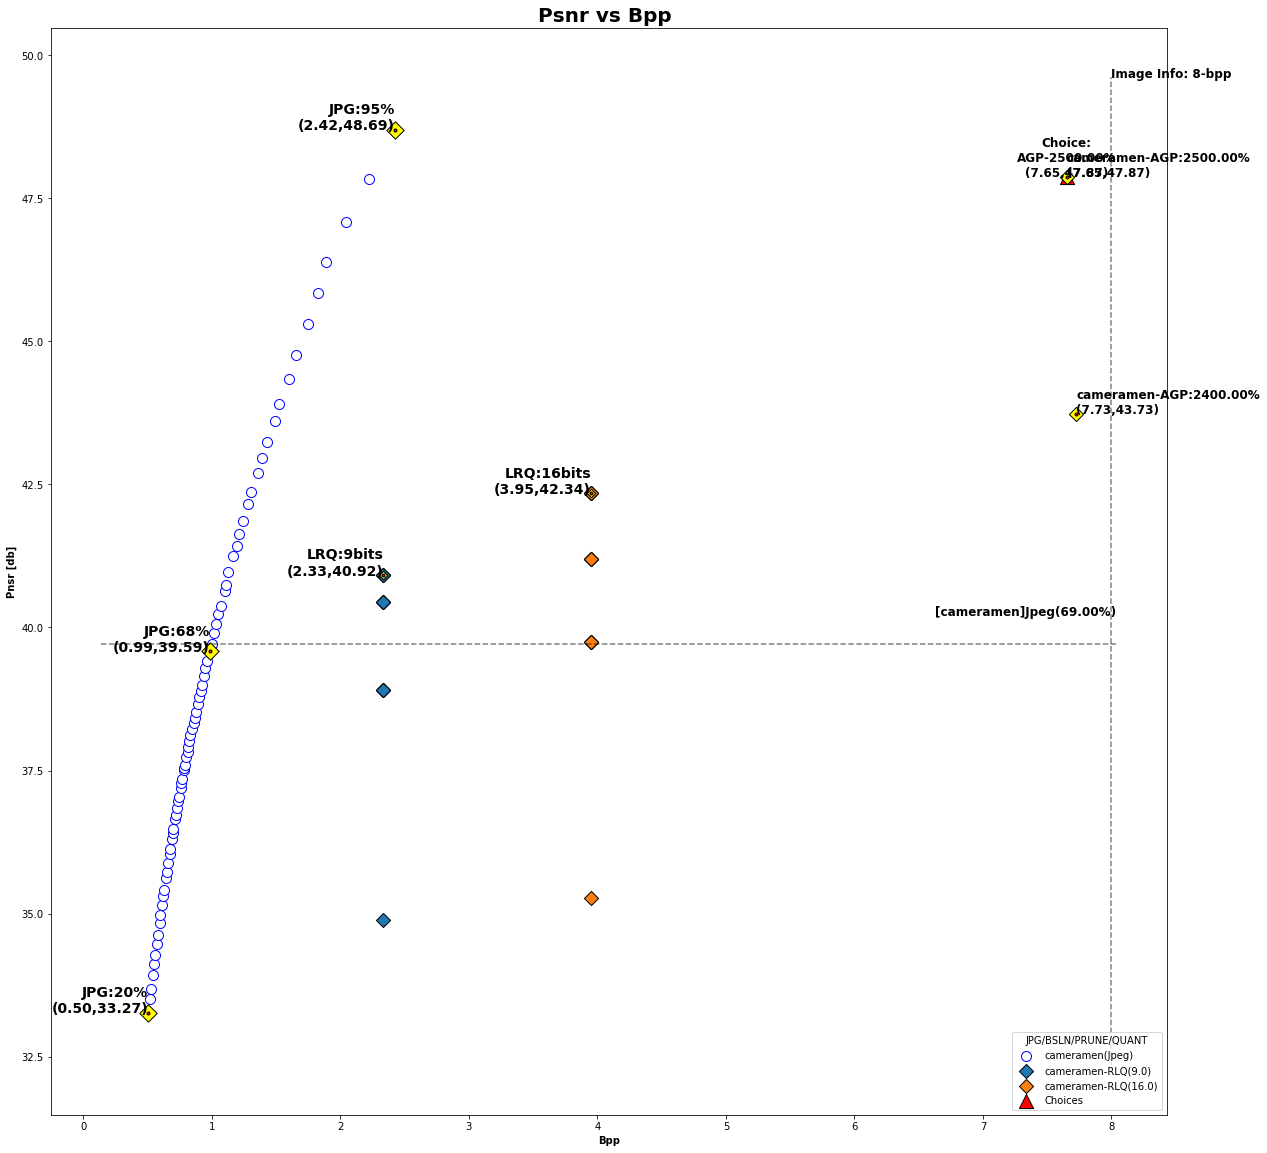

In [43]:
image_name = conf_data["input_data"]["image_name"]
show_data_from_datasets(
    jpeg_df=jpeg_df, prune_df=pruned_df, quant_df=quant_df,
    model_choices=model_choices,
    image_names=[image_name]
);

In [44]:
quanted_test066_df = copy.deepcopy(quant_df)

In [45]:
image_name = "cameramen"
jpeg_df = dataset_loaders.load_jpeg_dataset(dtype="dataframe", image_name=f"{image_name}")
pruned_df = dataset_loaders.load_prunining_dataset(dtype="dataframe", image_name=f"{image_name}")
quant_df = dataset_loaders.load_quant_dataset(dtype="dataframe")
baseline_df = dataset_loaders.load_siren_baselines_dataset(dtype="dataframe")

model_choices = pd.DataFrame()

In [46]:
pos = baseline_df["bpp"] <= 12.0
baseline_df = baseline_df[pos]

In [47]:
jpeg_df["image_name"] = [image_name] * jpeg_df.shape[0]
pruned_df["image_name"] = [image_name] * pruned_df.shape[0]

In [48]:
quant_df["quant_techs_2"] = [f"{image_name}-RLQ"] * quant_df.shape[0]
pruned_df["image_name_2"] = [f"{image_name}-AGP"] * pruned_df.shape[0]

In [49]:
def create_quality_attr(item):
    quality = float(item.split(":")[1])
    return quality
vals = jpeg_df["cmprss-class"].values
jpeg_df["quality"] = list(map(create_quality_attr, vals))

In [50]:
def create_prune_rate_attr(item):
    prune_rate = float(item.split(":")[1]) / 100
    return prune_rate
vals = pruned_df["cmprss-class"].values
pruned_df["prune_rate"] = list(map(create_prune_rate_attr, vals))

In [51]:
a_date = quant_df["init_from"].unique()[0]

In [52]:
pruned_df["date"].unique()

array(['2020.12.10-044629', '2020.12.09-085652', '2020.12.08-191157',
       '2020.12.07-045630', '2020.12.11-171610', '2020.12.12-190415',
       '2020.12.13-232457', '2020.12.14-174343', '2020.12.15-173411',
       '2020.12.14-102807'], dtype=object)

In [53]:
pos = pruned_df["date"] == a_date
a_pruned_row = pruned_df[pos].head(1)
a_pruned_row["prune_techs"] = ["AGP"] * a_pruned_row.shape[0]
a_pruned_row

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals,image_name,image_name_2,prune_rate,prune_techs
409,2020.12.13-232457,2020.11.29-231149,52036.0,61.962372,45.786802,6.352051,0.610155,0.000106,0.989081,AGP:38,AGP,AGP,35-40,cameramen,cameramen-AGP,0.38,AGP


In [54]:
baseline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 24 to 324
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  214 non-null    object 
 1   init-from             214 non-null    object 
 2   size(byte)            214 non-null    float64
 3   footprint(%)          214 non-null    float64
 4   psnr                  214 non-null    float64
 5   bpp                   214 non-null    float64
 6   CR                    214 non-null    float64
 7   mse                   214 non-null    float64
 8   ssim                  214 non-null    float64
 9   cmprss-class          214 non-null    object 
 10  cmprss-class-2        214 non-null    object 
 11  cmprss-class-3        214 non-null    object 
 12  prune_rate_intervals  214 non-null    object 
dtypes: float64(7), object(6)
memory usage: 23.4+ KB


In [55]:
a_date = a_pruned_row["init-from"].values[0]
pos = baseline_df["date"] == a_date
baseline_df[pos].head(5)

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals


In [56]:
def filter_required_data(item, n_hf=64, n_hl=5):
    return f"hf={str(n_hf)}" in item and f"hl={str(n_hl)}" in item
vals = baseline_df["cmprss-class"].values
pos = list(map(filter_required_data, vals))
a_baseline_row = baseline_df[pos].head(1)

a_baseline_row["prune_techs"] = ["BASELINE"] * a_baseline_row.shape[0]
a_baseline_row["prune_rate"] = ["-"] * a_baseline_row.shape[0]

a_baseline_row

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals,prune_techs,prune_rate
84,1603774067-025589,-,84228.0,100.0,49.973107,10.281738,0.376953,0.000041,0.99574,Baseline:hf=64:hl=5,SIREN,SIREN,SIREN,BASELINE,-


In [57]:
model_choices = pd.concat([a_baseline_row, a_pruned_row], axis = 0, ignore_index=True)

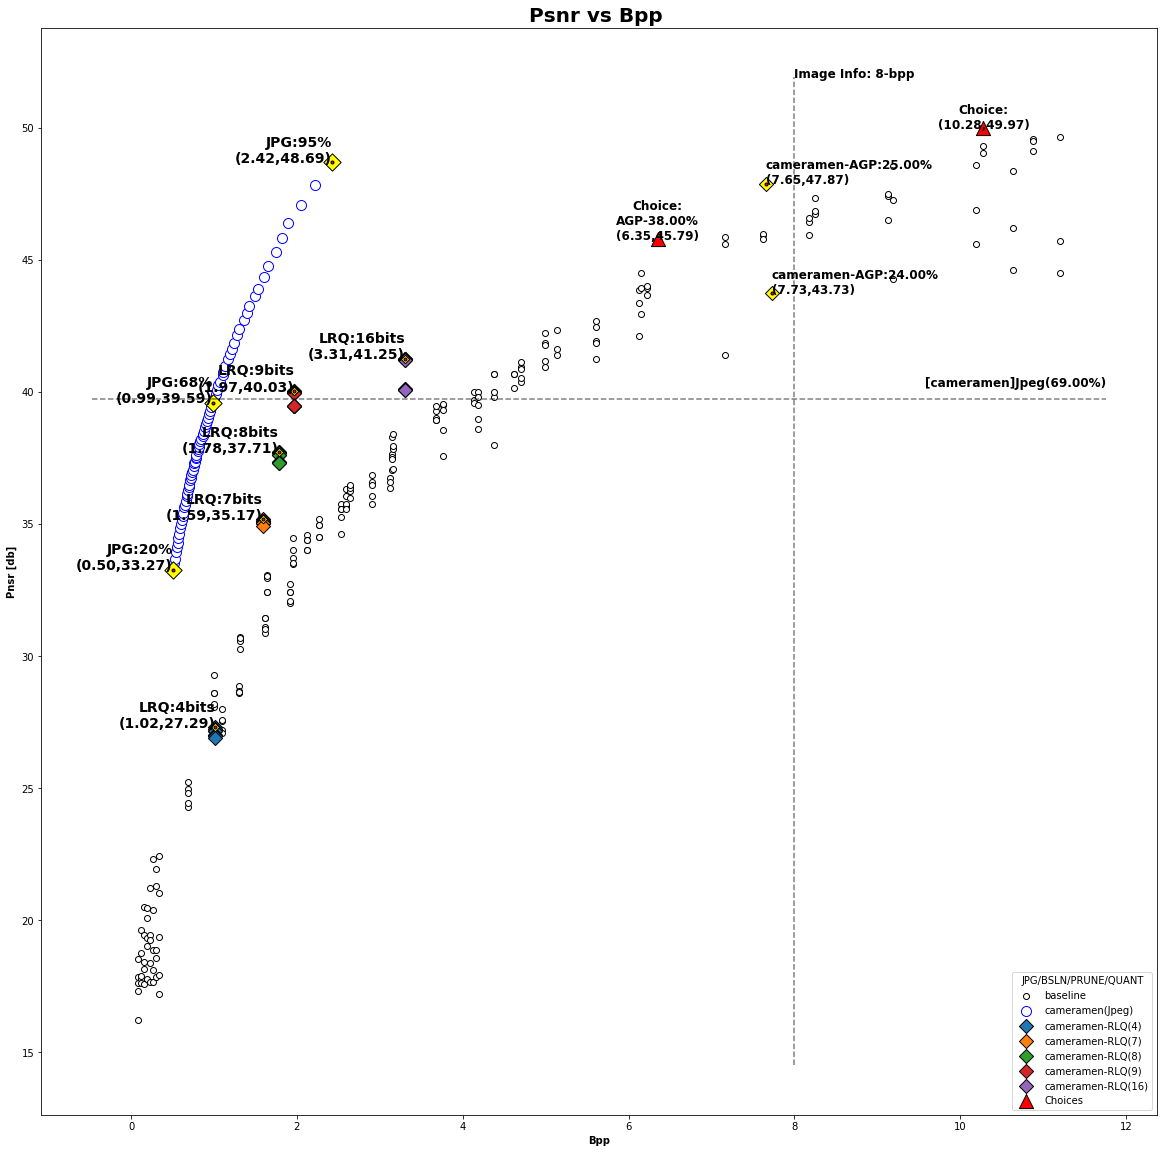

In [58]:
image_name = "cameramen"
show_data_from_datasets(
    jpeg_df=jpeg_df, prune_df=pruned_df, quant_df=quant_df,
    model_choices=model_choices, baseline_df=baseline_df,
    image_names=[image_name]
);

In [59]:
jpeg_df.head(1)

,Unnamed: 0,mse,psnr,ssim,quality,size_byte,bpp,width,height,CR,image_name,cmprss-class,cmprss-class-2,cmprss-class-3,prune_techs,prune_rate,quant_tech,nbits
0,0,30.618301,33.270993,0.939424,20.0,4133.0,0.504517,256,256,7.682071,cameramen,Jpeg:20.00,Jpeg,Jpeg,Jpeg,NaN,Jpeg,32


### Jpeg only plots
---

In [60]:
image_name = "cameramen"
jpeg_cameramen_df = dataset_loaders.load_jpeg_dataset(dtype="dataframe", image_name=f"{image_name}")

image_name = "test066"
jpeg_test066_df = dataset_loaders.load_jpeg_dataset(dtype="dataframe", image_name=f"{image_name}")

In [61]:
jpeg_dfs_list: list = [jpeg_cameramen_df, jpeg_test066_df]
merged_jpeg_df = pd.concat(
    jpeg_dfs_list, axis = 0, ignore_index=True
)

In [62]:
merged_jpeg_df.head(3)

,Unnamed: 0,mse,psnr,ssim,quality,size_byte,bpp,width,height,CR,image_name,cmprss-class,cmprss-class-2,cmprss-class-3,prune_techs,prune_rate,quant_tech,nbits
0,0,30.618301,33.270993,0.939424,20,4133.0,0.504517,256,256,7.682071,cameramen,Jpeg:20.00,Jpeg,Jpeg,Jpeg,NaN,Jpeg,32
1,1,28.949783,33.514350,0.940436,21,4246.0,0.518311,256,256,7.477626,cameramen,Jpeg:21.00,Jpeg,Jpeg,Jpeg,NaN,Jpeg,32
2,2,27.839966,33.684117,0.941620,22,4342.0,0.530029,256,256,7.312298,cameramen,Jpeg:22.00,Jpeg,Jpeg,Jpeg,NaN,Jpeg,32


In [63]:
merged_jpeg_df.tail(3)

,Unnamed: 0,mse,psnr,ssim,quality,size_byte,bpp,width,height,CR,image_name,cmprss-class,cmprss-class-2,cmprss-class-3,prune_techs,prune_rate,quant_tech,nbits
149,73,0.607071,50.298409,0.995580,93,11263.0,1.374878,256,256,2.180591,test066,Jpeg:93.00,Jpeg,Jpeg,Jpeg,NaN,Jpeg,32
150,74,0.323776,53.028354,0.997167,94,11948.0,1.458496,256,256,2.055574,test066,Jpeg:94.00,Jpeg,Jpeg,Jpeg,NaN,Jpeg,32
151,75,0.038757,62.247266,0.999475,95,12603.0,1.538452,256,256,1.948742,test066,Jpeg:95.00,Jpeg,Jpeg,Jpeg,NaN,Jpeg,32


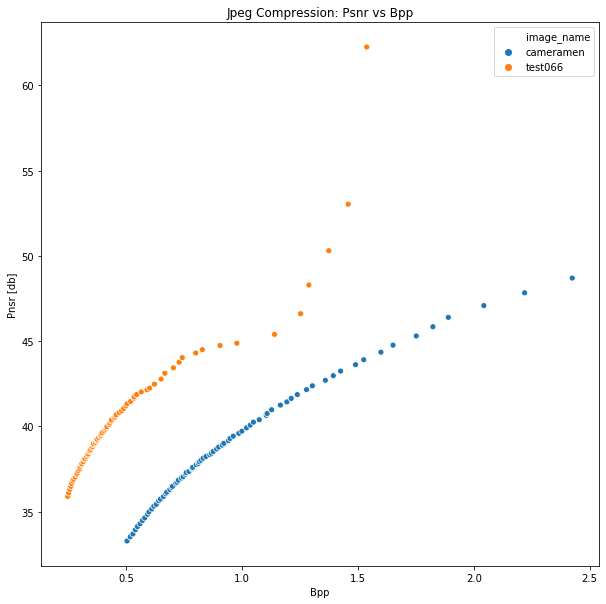

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(data=merged_jpeg_df, x="bpp", y="psnr", hue="image_name", ax=ax)

ax.set_xlabel("Bpp")

ax.set_ylabel("Pnsr [db]")
ax.set_title("Jpeg Compression: Psnr vs Bpp")
plt.show();

### Pruned Datasets only plots
---

In [65]:
image_name = "cameramen"
pruned_cameramen_df = dataset_loaders.load_prunining_dataset(dtype="dataframe", image_name=f"{image_name}")
pruned_cameramen_df["image_name"] = ["cameramen"] * pruned_cameramen_df.shape[0]

image_name = "test066"
pruned_test066_df = dataset_loaders.load_prunining_dataset(dtype="dataframe", image_name=f"{image_name}")

In [66]:
pruned_dfs_list: list = [pruned_cameramen_df, pruned_test066_df]
merged_pruned_df = pd.concat(
    pruned_dfs_list, axis = 0, ignore_index=True
)

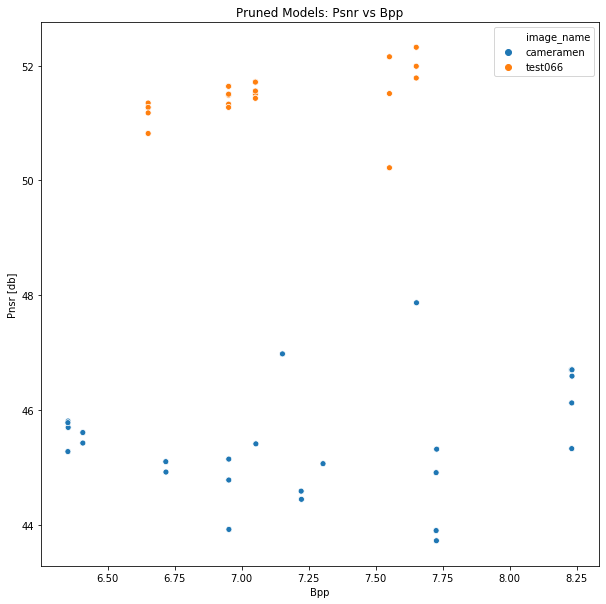

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(data=merged_pruned_df, x="bpp", y="psnr", hue="image_name", ax=ax)

ax.set_xlabel("Bpp")
ax.set_ylabel("Pnsr [db]")
ax.set_title("Pruned Models: Psnr vs Bpp")
plt.show();

### Jpeg+Pruned Datasets only plots
---

In [68]:
def show_merged_jpeg_data_points(a_df:pd.DataFrame=pd.DataFrame(), x_attr:str="bpp", y_attr:str="psnr", gk=None, ax=None, payload_jpeg:dict=None, **kwargs) -> None:
    if a_df.shape[0] == 0: return
    if ax is None: return
    if gk is None : return

    if not isinstance(gk, list):
        gk = [gk]

    try:
        for ii, (k, data) in enumerate(a_df.groupby(by = gk)):
            x, y = data[x_attr].values, data[y_attr].values
            label=f"{k}(JPG)"
            if payload_jpeg:
                if k in payload_jpeg.keys():
                    try:
                        k_style = payload_jpeg[k]
                        ax.scatter(x, y, label=label, marker=k_style["marker"], color=k_style["color"], edgecolor=k_style["edgecolor"])
                    except:
                        ax.scatter(x, y, label=label, marker="o")
                        pass
                else: 
                    ax.scatter(x, y, label=label, marker="o")
                    pass
                pass
            else:
                if ii % 2 == 0:
                    ax.scatter(x, y, label=label, marker="+")
                else:
                    ax.scatter(x, y, label=label, marker="+")
                pass
            pass
    except Exception as err:
        print(f"{str(err)}")
        pass
    pass

In [69]:
def show_merged_pruned_data_points(a_df:pd.DataFrame=pd.DataFrame(), x_attr:str="bpp", y_attr:str="psnr", gk=None, ax=None, payload_pruned:dict=None, **kwargs) -> None:
    if a_df.shape[0] == 0: return
    if ax is None: return
    if gk is None : return

    if not isinstance(gk, list):
        gk = [gk]

    try:
        for ii, (k, data) in enumerate(a_df.groupby(by = gk)):
            x, y = data[x_attr].values, data[y_attr].values
            label=f"{k}(AGP)"
            if payload_pruned:
                if k in payload_pruned.keys():
                    try:
                        k_style = payload_pruned[k]
                        ax.scatter(x, y, label=label, marker=k_style["marker"], color=k_style["color"], edgecolor=k_style["edgecolor"], s=100)
                    except:
                        ax.scatter(x, y, label=label, marker="o")
                        pass
                else: 
                    ax.scatter(x, y, label=label, marker="o")
                    pass
                pass
            else:
                if ii % 2 == 0:
                    ax.scatter(x, y, label=label, marker="o", edgecolor="black", s=100)
                else:
                    ax.scatter(x, y, label=label, marker="o", edgecolor="black", s=100)
                pass
            pass
    except Exception as err:
        print(f"{str(err)}")
        pass
    pass

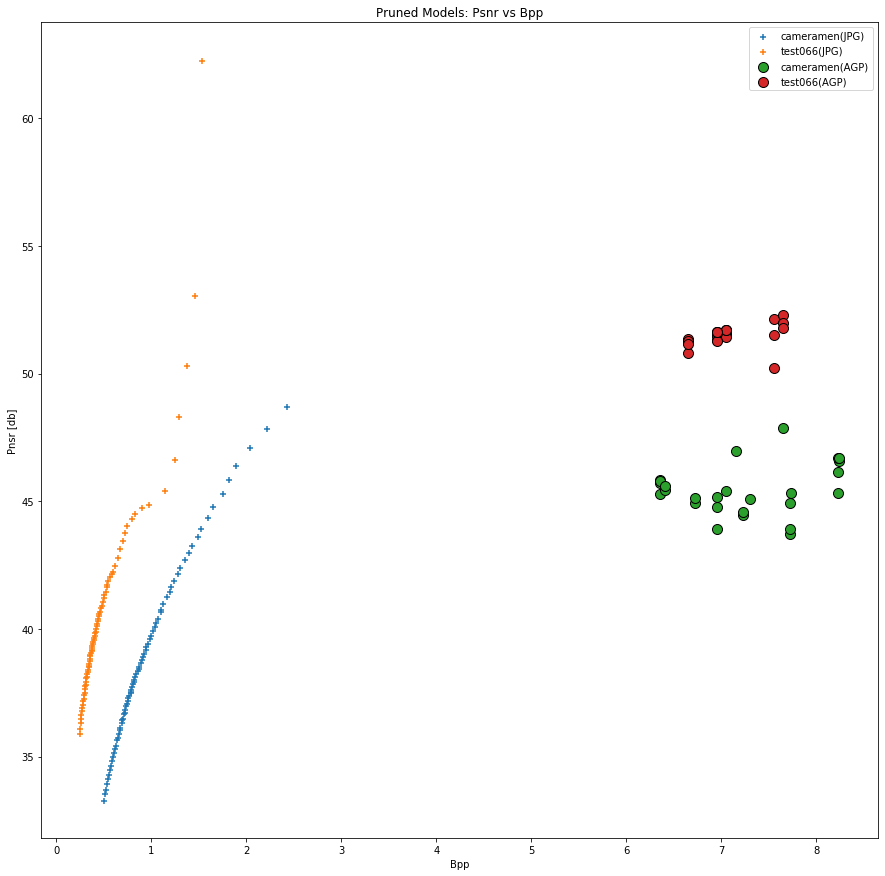

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

show_merged_jpeg_data_points(a_df=merged_jpeg_df, ax=ax, gk="image_name")
show_merged_pruned_data_points(a_df=merged_pruned_df, ax=ax, gk="image_name")


ax.set_xlabel("Bpp")
ax.set_ylabel("Pnsr [db]")
ax.set_title("Pruned Models: Psnr vs Bpp")
plt.legend()
plt.show();

### Jpeg+Pruned+Quanted Datasets plots
----

In [71]:
image_name = "cameramen"
jpeg_cameramen_df = dataset_loaders.load_jpeg_dataset(dtype="dataframe", image_name=f"{image_name}")

image_name = "test066"
jpeg_test066_df = dataset_loaders.load_jpeg_dataset(dtype="dataframe", image_name=f"{image_name}")

jpeg_dfs_list: list = [jpeg_cameramen_df, jpeg_test066_df]
merged_jpeg_df = pd.concat(
    jpeg_dfs_list, axis = 0, ignore_index=True
)

In [72]:
image_name = "cameramen"
pruned_cameramen_df = dataset_loaders.load_prunining_dataset(dtype="dataframe", image_name=f"{image_name}")
pruned_cameramen_df["image_name"] = ["cameramen"] * pruned_cameramen_df.shape[0]

image_name = "test066"
pruned_test066_df = dataset_loaders.load_prunining_dataset(dtype="dataframe", image_name=f"{image_name}")

pruned_dfs_list: list = [pruned_cameramen_df, pruned_test066_df]
merged_pruned_df = pd.concat(
    pruned_dfs_list, axis = 0, ignore_index=True
)

In [73]:
image_name = "cameramen"
# quanted_cameramen_df = dataset_loaders.load_quant_dataset(dtype="dataframe", image_name=f"{image_name}")
quanted_cameramen_df = dataset_loaders.load_quant_dataset(dtype="dataframe")
quanted_cameramen_df["image_name"] = [f"{image_name}"] * quanted_cameramen_df.shape[0]

image_name = "test066"
# pruned_test066_df = dataset_loaders.load_quant_dataset(dtype="dataframe", image_name=f"{image_name}")
# quanted_test066_df = copy.deepcopy(quant_df)
quanted_test066_df["image_name"] = [f"{image_name}"] * quanted_test066_df.shape[0]

quanted_dfs_list: list = [quanted_cameramen_df, quanted_test066_df]
merged_quanted_df = pd.concat(
    quanted_dfs_list, axis = 0, ignore_index=True
)

In [74]:
def show_quant_data_points(a_df:pd.DataFrame=pd.DataFrame(), x_attr:str="bpp", y_attr:str="psnr", gk=None, ax=None, payload_quanted:dict=None, **kwargs) -> None:
    if a_df.shape[0] == 0: return
    if ax is None: return
    if gk is None : return

    if not isinstance(gk, list):
        gk = [gk]

    try:
        for ii, (k, data) in enumerate(a_df.groupby(by = gk)):
            tmp_x = data.sort_values(by=[x_attr], ascending=False)[x_attr].values[0:10]
            tmp_y = data.sort_values(by=[y_attr], ascending=False)[y_attr].values[0:10]

            x, y = tmp_x, tmp_y
            label=f"{k}(RLQ)"
            if payload_quanted:
                if k in payload_quanted.keys():
                    try:
                        k_style = payload_quanted[k]
                        ax.scatter(x, y, label=label, marker=k_style["marker"], color=k_style["color"], edgecolor=k_style["edgecolor"])
                    except:
                        ax.scatter(x, y, label=label, marker="o")
                        pass
                else: 
                    ax.scatter(x, y, label=label, marker="o")
                    pass
                pass
            else:
                if k[0] == "cameramen":
                    ax.scatter(x, y, label=label, marker="^", s=100, edgecolor="black")
                else:
                    ax.scatter(x, y, label=label, marker="v", s=100, edgecolor="black")
                pass
            pass
    except Exception as err:
        print(f"{str(err)}")
        pass
    pass

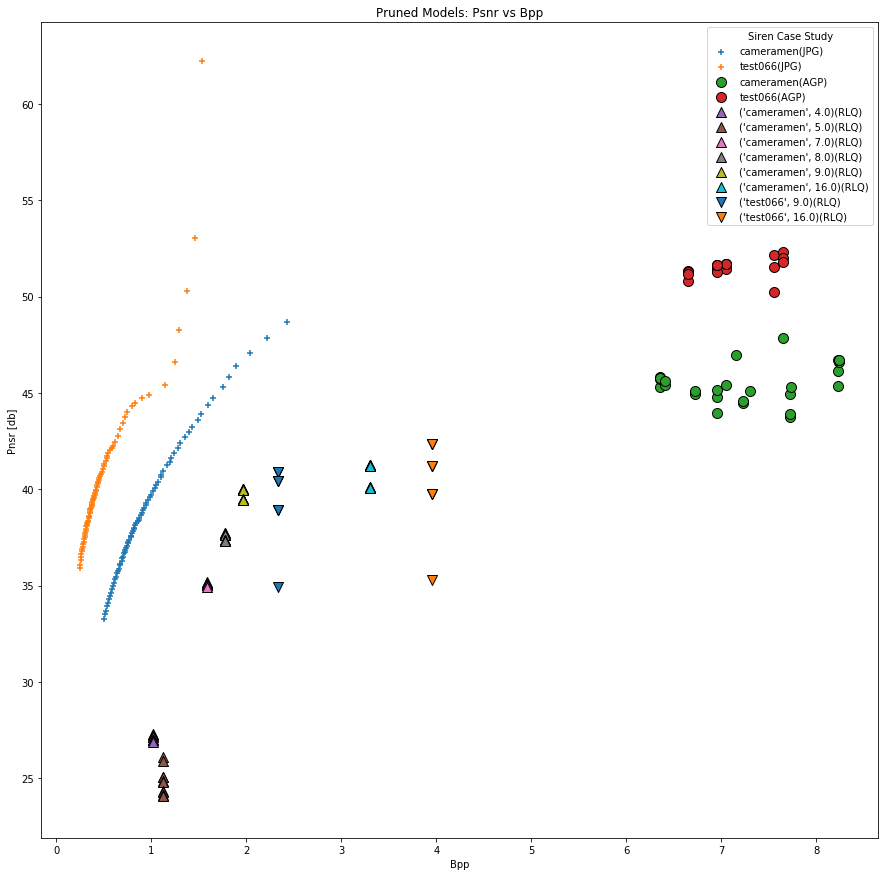

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

show_merged_jpeg_data_points(a_df=merged_jpeg_df, ax=ax, gk="image_name")
show_merged_pruned_data_points(a_df=merged_pruned_df, ax=ax, gk="image_name")
show_quant_data_points(a_df=merged_quanted_df, ax=ax, gk=["image_name", "nbits"])


ax.set_xlabel("Bpp")
ax.set_ylabel("Pnsr [db]")
ax.set_title("Pruned Models: Psnr vs Bpp")
plt.legend(title="Siren Case Study")
plt.show();

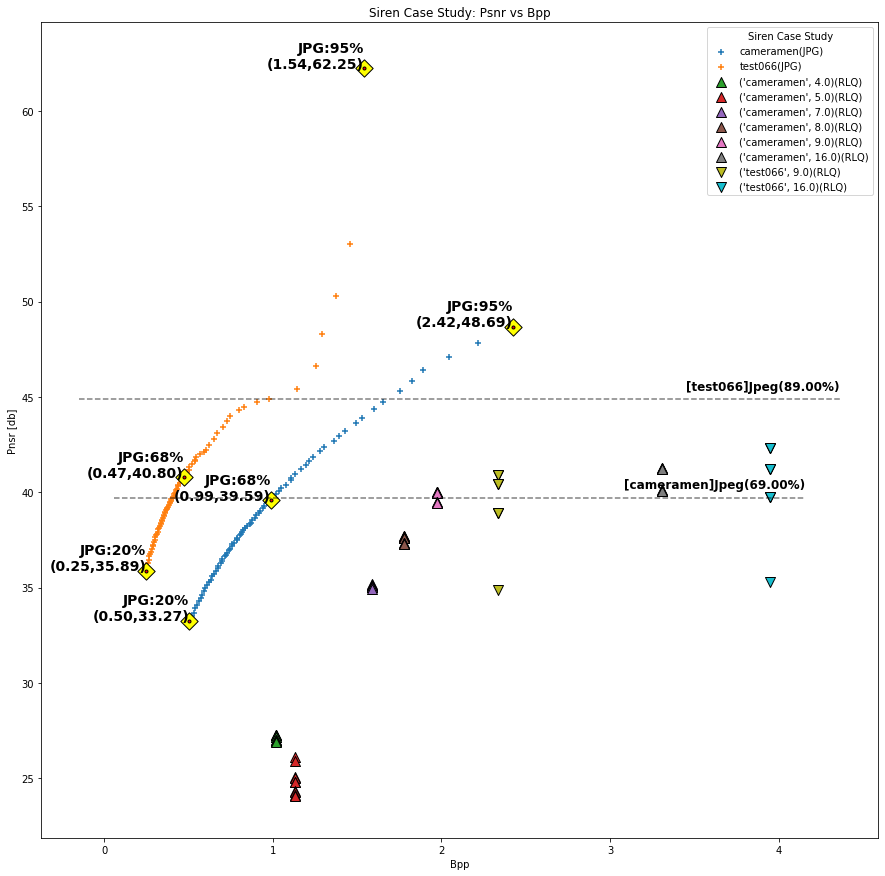

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))



show_merged_jpeg_data_points(a_df=merged_jpeg_df, ax=ax, gk="image_name")
# show_merged_pruned_data_points(a_df=merged_pruned_df, ax=ax, gk="image_name")
show_quant_data_points(a_df=merged_quanted_df, ax=ax, gk=["image_name", "nbits"])

qualities = [20, 68, 95]
for image_name in merged_jpeg_df["image_name"].unique():
    add_jpeg_fixed_points(
        jpeg_df=merged_jpeg_df, image_name=image_name,
        qualities=qualities, ax=ax, horizontalalignment="right")
    pass


ax.set_xlabel("Bpp")
ax.set_ylabel("Pnsr [db]")
ax.set_title("Siren Case Study: Psnr vs Bpp")
plt.legend(title="Siren Case Study")
plt.show();

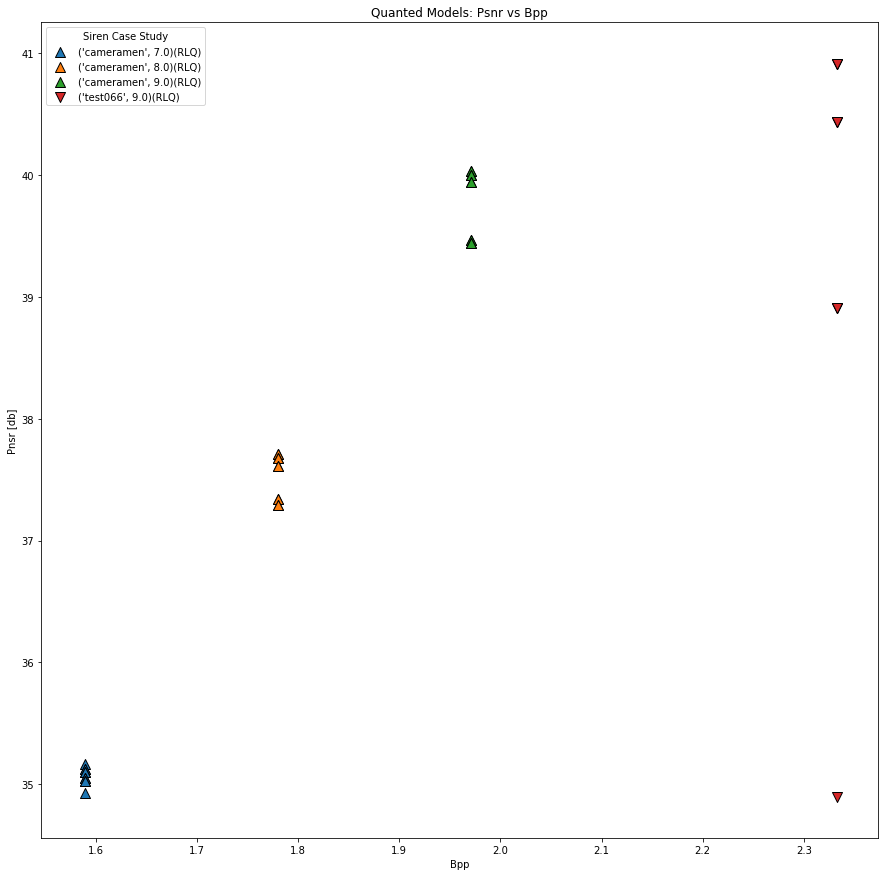

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

pos = (merged_quanted_df["nbits"] >= 7) & (merged_quanted_df["nbits"] < 16)
show_quant_data_points(a_df=merged_quanted_df[pos], ax=ax, gk=["image_name", "nbits"])


ax.set_xlabel("Bpp")
ax.set_ylabel("Pnsr [db]")
ax.set_title("Quanted Models: Psnr vs Bpp")
plt.legend(title="Siren Case Study")
plt.show();

### Add Images
---

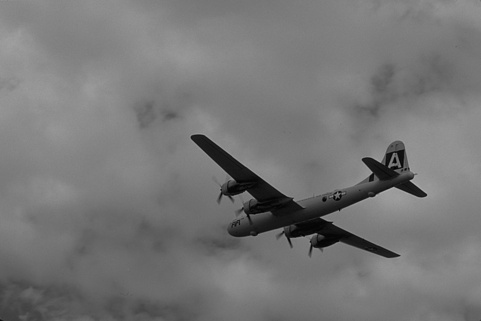

In [78]:
image_name="test066"
image_test066 = dataset_loaders.load_image_by_name(image_name=f"{image_name}")
image_test066

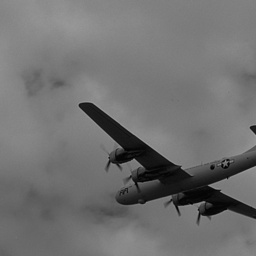

In [79]:
image_name="test066"
image_test066 = dataset_loaders.load_image_by_name(image_name=f"{image_name}", cropped_center=256)
image_test066

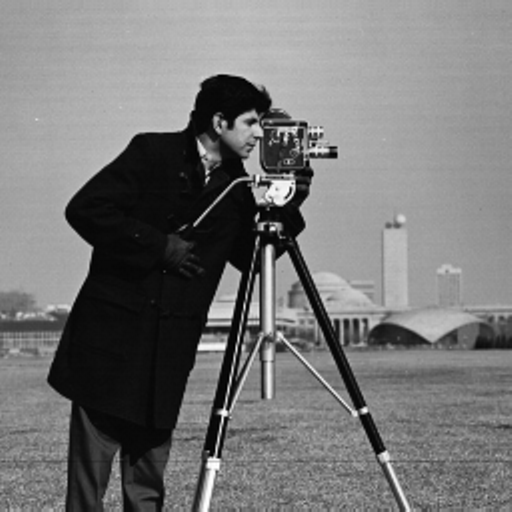

In [80]:
image_name="cameramen"
image_cameramen = dataset_loaders.load_image_by_name(image_name=f"{image_name}")
image_cameramen

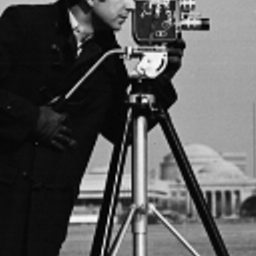

In [81]:
image_name="cameramen"
image_cameramen = dataset_loaders.load_image_by_name(image_name=f"{image_name}", cropped_center=256)
image_cameramen

In [82]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [83]:
def show_images_withi_plot(
    pos_x=6.3, pos_y=37, pos_2_x=4.5, pos_2_y=37,
    delta_x=0.5, delta_2_x=0.5,
    images_list:list = [],
    delta_y=0.5, delta_y_2=0.5, ax=None):
    
    if ax is None: return
    if images_list == []: return

    image_name="cameramen"
    if image_name in images_list:
        image_cameramen = dataset_loaders.load_image_by_name(image_name=f"{image_name}", cropped_center=256)

        image_cameramen_smaller = image_cameramen.resize((160, 160), Image.ANTIALIAS, )
        ax.add_artist(
            AnnotationBbox(
                OffsetImage(image_cameramen_smaller, cmap='gray',)
                , (pos_x, pos_y)
                , frameon=False
            ) 
        )
        ax.text(pos_x-delta_x, pos_y + delta_y, "cameramen (256x256)", fontsize=12, fontweight="bold")

    image_name="test066"
    if image_name in images_list:
        image_test066 = dataset_loaders.load_image_by_name(image_name=f"{image_name}", cropped_center=256)

        image_test066_smaller = image_test066.resize((160, 160), Image.ANTIALIAS, )
        ax.add_artist(
            AnnotationBbox(
                OffsetImage(image_test066_smaller, cmap='gray',)
                , (pos_2_x, pos_2_y)
                , frameon=False
            )
        )
        ax.text(pos_2_x-delta_2_x, pos_2_y + delta_y_2, "test066 (256x256)", fontsize=12, fontweight="bold")
    pass

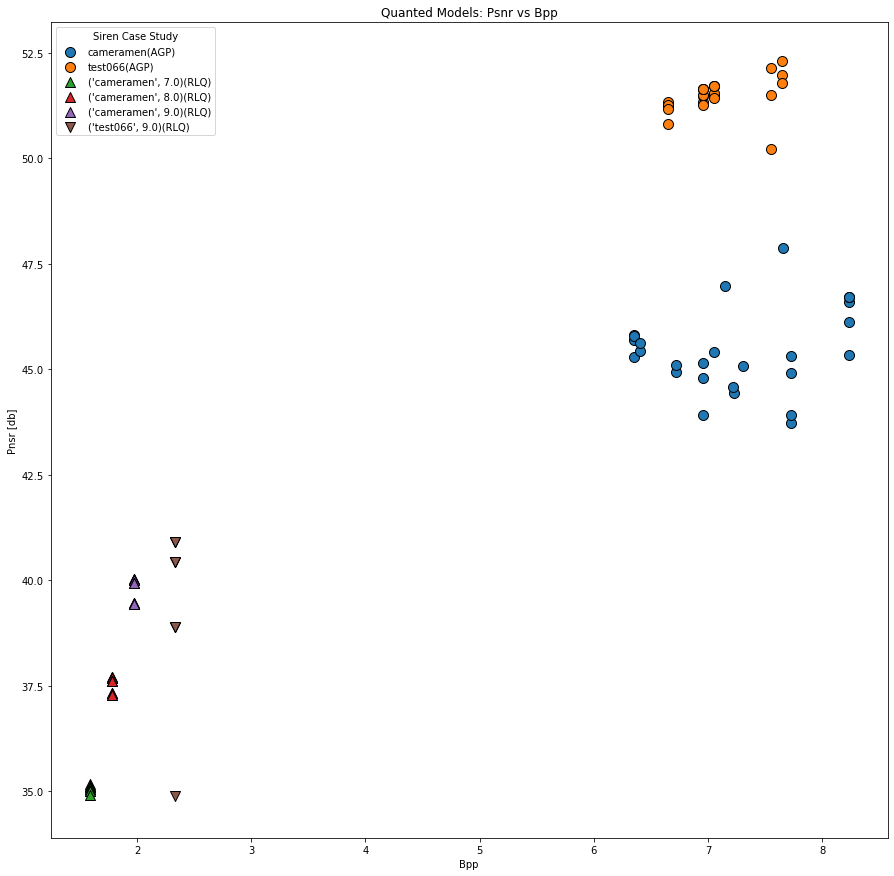

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

show_images_withi_plot(ax=ax, delta_y_2=0.5, delta_y=0.5)

show_merged_pruned_data_points(a_df=merged_pruned_df, ax=ax, gk="image_name")
pos = (merged_quanted_df["nbits"] >= 7) & (merged_quanted_df["nbits"] < 16)
show_quant_data_points(a_df=merged_quanted_df[pos], ax=ax, gk=["image_name", "nbits"])


ax.set_xlabel("Bpp")
ax.set_ylabel("Pnsr [db]")
ax.set_title("Quanted Models: Psnr vs Bpp")
plt.legend(title="Siren Case Study")

plt.show();

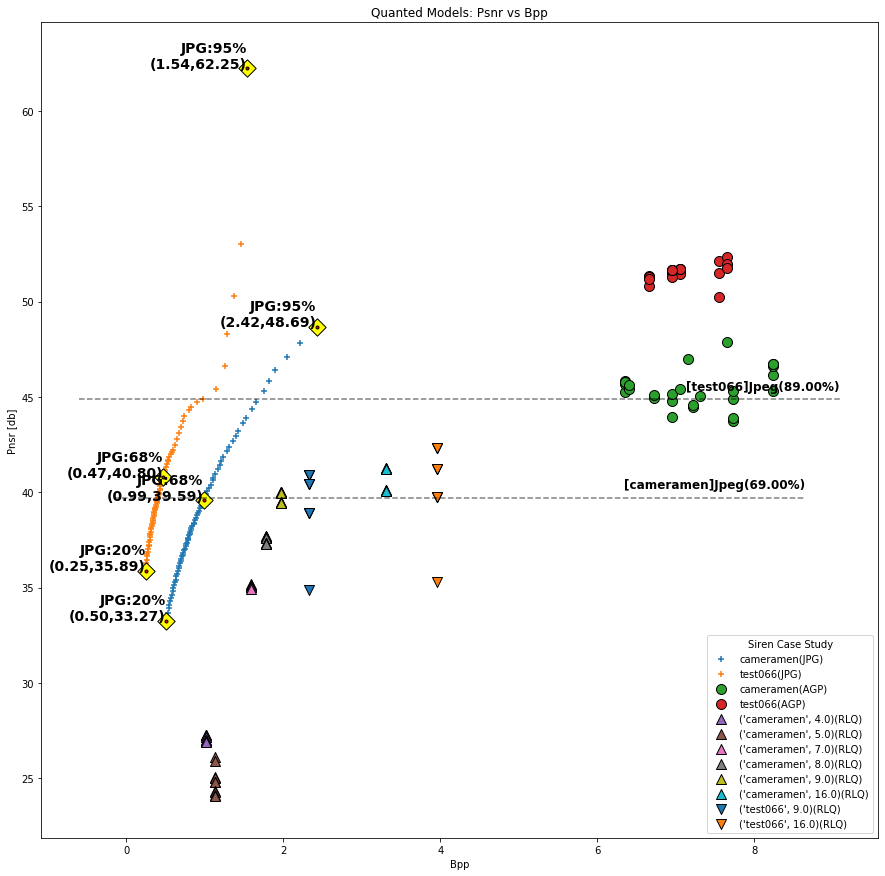

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

show_images_withi_plot(
    pos_x=6.3, pos_y=30, pos_2_x=3.5, pos_2_y=30,
    delta_x=1.0, delta_2_x=0.5,
    delta_y_2=4.5, delta_y=4.8,
    ax=ax)

show_merged_jpeg_data_points(a_df=merged_jpeg_df, ax=ax, gk="image_name")
show_merged_pruned_data_points(a_df=merged_pruned_df, ax=ax, gk="image_name")
show_quant_data_points(a_df=merged_quanted_df, ax=ax, gk=["image_name", "nbits"])

qualities = [20, 68, 95]
for image_name in merged_jpeg_df["image_name"].unique():
    add_jpeg_fixed_points(
        jpeg_df=merged_jpeg_df, image_name=image_name,
        qualities=qualities, ax=ax, horizontalalignment="right")
    pass


ax.set_xlabel("Bpp")
ax.set_ylabel("Pnsr [db]")
ax.set_title("Quanted Models: Psnr vs Bpp")
plt.legend(title="Siren Case Study", loc="lower right")

plt.show();

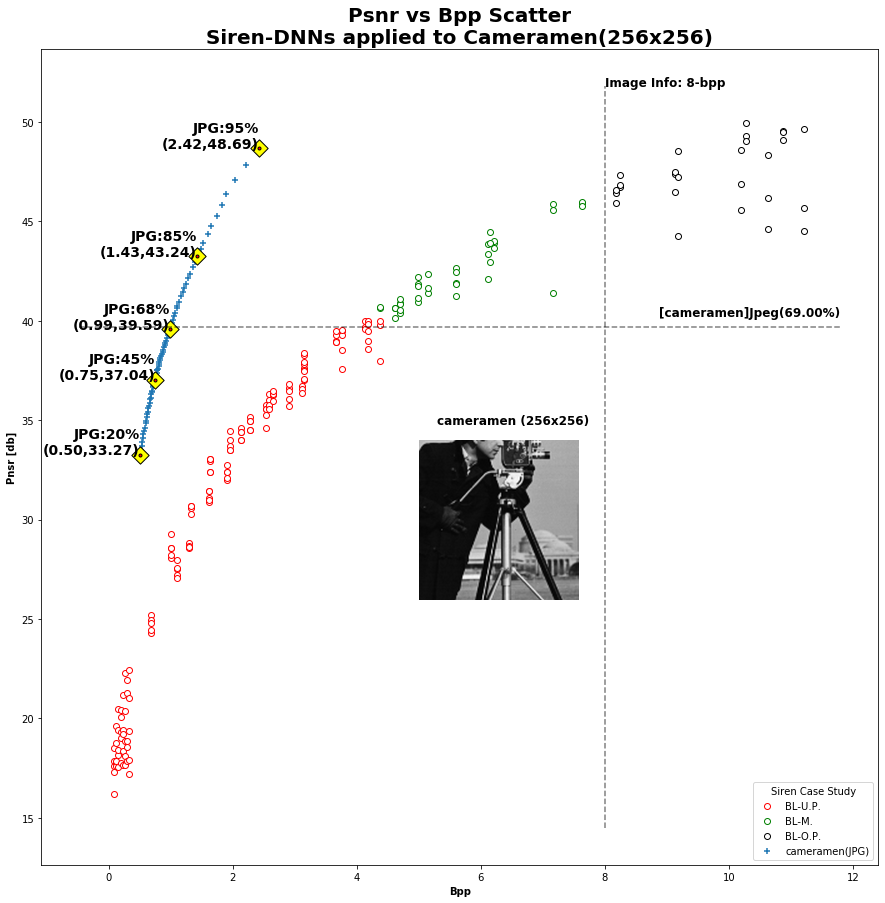

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

images_list=jpeg_cameramen_df["image_name"].unique()

show_images_withi_plot(
    pos_x=6.3, pos_y=30, pos_2_x=3.5, pos_2_y=30,
    delta_x=1.0, delta_2_x=0.5,
    delta_y_2=4.5, delta_y=4.8,
    images_list=images_list,
    ax=ax)

show_baseline_df(a_df=baseline_df, ax=ax, thsd_list=[40, 8.0])
# show_models_choices(a_df=model_choices, ax=ax)

show_merged_jpeg_data_pofig, ax = plt.subplots(1, 1, figsize=(15, 15))

images_list=jpeg_cameramen_df["image_name"].unique()

show_images_withi_plot(
    pos_x=6.3, pos_y=30, pos_2_x=3.5, pos_2_y=30,
    delta_x=1.0, delta_2_x=0.5,
    delta_y_2=4.5, delta_y=4.8,
    images_list=images_list,
    ax=ax)
ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")
plt.legend(title="Siren Case Study", loc="lower right");ints(a_df=jpeg_cameramen_df, ax=ax, gk="image_name")
# show_merged_pruned_data_points(a_df=pruned_cameramen_df, ax=ax, gk="image_name")
# show_quant_data_points(a_df=quanted_cameramen_df, ax=ax, gk=["image_name", "nbits"])

qualities = [20, 45, 68, 85, 95]
for image_name in jpeg_cameramen_df["image_name"].unique():
    add_jpeg_fixed_points(
        jpeg_df=jpeg_cameramen_df, image_name=image_name,
        qualities=qualities, ax=ax, horizontalalignment="right")
    pass


ymin, ymax = ax.get_ylim()
ax.vlines(ymin=ymin, ymax=ymax, x = 8, linestyle="--", alpha=0.5)
ax.text(y = ymax, x = 8, s="Image Info: 8-bpp", fontdict={'fontsize': 12, 'fontweight': 'bold'})

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")
plt.legend(title="Siren Case Study", loc="lower right");max=ymax, x = 8, linestyle="--", alpha=0.5)
ax.text(y = ymax, x = 8, s="Image Info: 8-bpp", fontdict={'fontsize': 12, 'fontweight': 'bold'})

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")
plt.legend(title="Siren Case Study", loc="lower right");

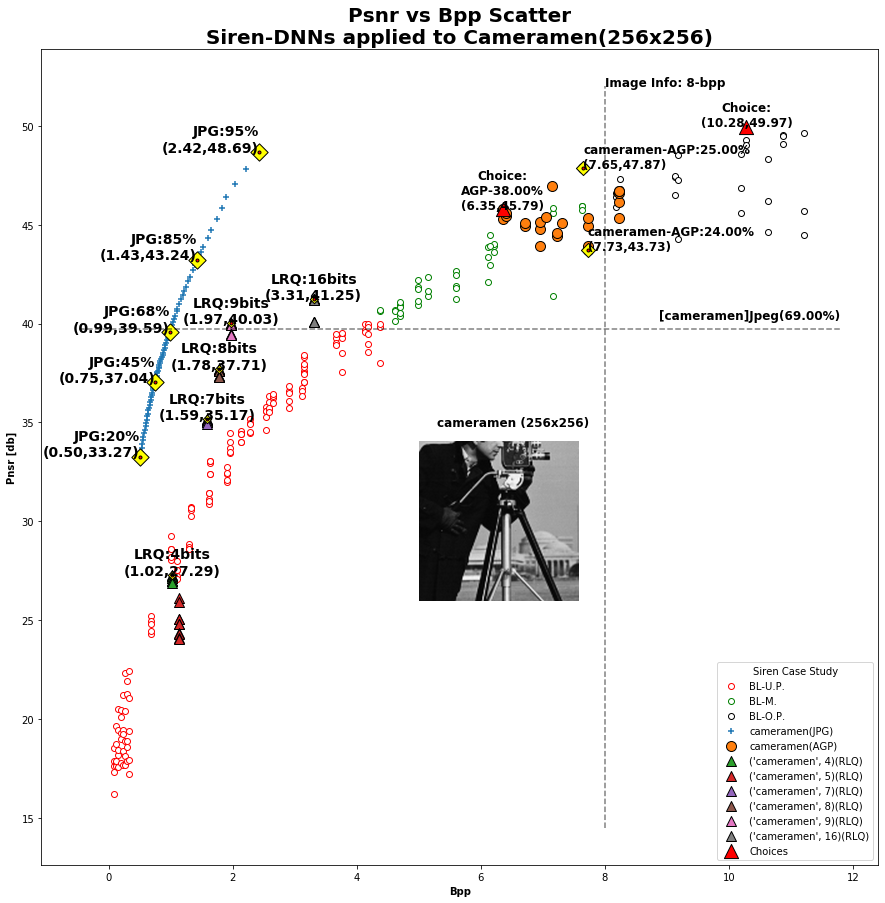

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

images_list=jpeg_cameramen_df["image_name"].unique()

show_images_withi_plot(
    pos_x=6.3, pos_y=30, pos_2_x=3.5, pos_2_y=30,
    delta_x=1.0, delta_2_x=0.5,
    delta_y_2=4.5, delta_y=4.8,
    images_list=images_list,
    ax=ax)

show_baseline_df(a_df=baseline_df, ax=ax, thsd_list=[40, 8.0])

show_merged_jpeg_data_points(a_df=jpeg_cameramen_df, ax=ax, gk="image_name")
show_merged_pruned_data_points(a_df=pruned_cameramen_df, ax=ax, gk="image_name")
show_quant_data_points(a_df=quanted_cameramen_df, ax=ax, gk=["image_name", "nbits"])

show_models_choices(a_df=model_choices, ax=ax)

qualities = [20, 45, 68, 85, 95]
for image_name in jpeg_cameramen_df["image_name"].unique():
    add_jpeg_fixed_points(
        jpeg_df=jpeg_cameramen_df, image_name=image_name,
        qualities=qualities, ax=ax, horizontalalignment="right")
    pass

image_name = "cameramen"
quanted_cameramen_df["quant_techs_2"] = [f"{image_name}-RLQ"] * quanted_cameramen_df.shape[0]
add_fixed_qat_points(a_df=quanted_cameramen_df, ax=ax, horizontalalignment="center")

pruned_cameramen_df["image_name_2"] = [f"{image_name}-AGP"] * pruned_cameramen_df.shape[0]
def create_prune_rate_attr(item):
    prune_rate = float(item.split(":")[1]) / 100
    return prune_rate
vals = pruned_cameramen_df["cmprss-class"].values
pruned_cameramen_df["prune_rate"] = list(map(create_prune_rate_attr, vals))
add_fixed_prune_points(a_df=pruned_cameramen_df, ax=ax, horizontalalignment="left")

ymin, ymax = ax.get_ylim()
ax.vlines(ymin=ymin, ymax=ymax, x = 8, linestyle="--", alpha=0.5)
ax.text(y = ymax, x = 8, s="Image Info: 8-bpp", fontdict={'fontsize': 12, 'fontweight': 'bold'})

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to Cameramen(256x256)", fontsize=20, fontweight="bold")
plt.legend(title="Siren Case Study", loc="lower right");


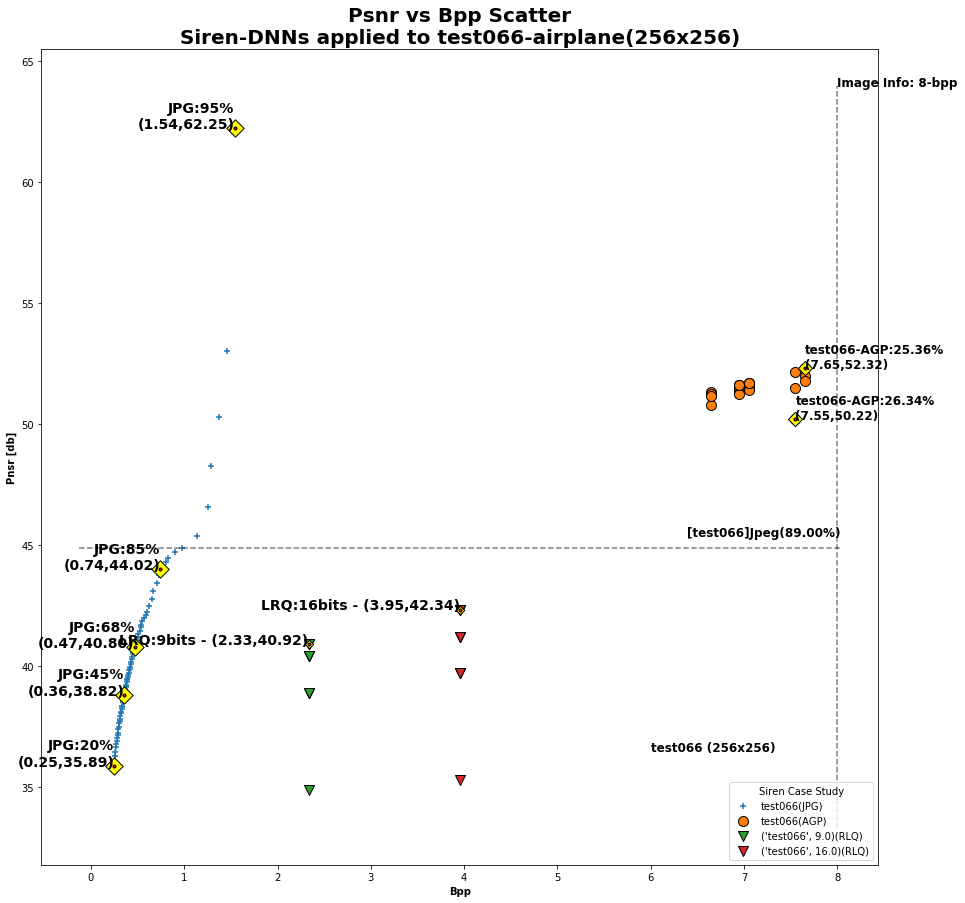

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

images_list=jpeg_test066_df["image_name"].unique()

show_images_withi_plot(
    pos_x=6.3, pos_y=30, pos_2_x=6.5, pos_2_y=30,
    delta_x=1.0, delta_2_x=0.5,
    delta_y_2=6.5, delta_y=3.8,
    images_list=images_list,
    ax=ax)

# show_baseline_df(a_df=baseline_df, ax=ax)
# show_models_choices(a_df=model_choices, ax=ax)

show_merged_jpeg_data_points(a_df=jpeg_test066_df, ax=ax, gk="image_name")
show_merged_pruned_data_points(a_df=pruned_test066_df, ax=ax, gk="image_name")
show_quant_data_points(a_df=quanted_test066_df, ax=ax, gk=["image_name", "nbits"])

qualities = [20, 45, 68, 85, 95]
for image_name in jpeg_test066_df["image_name"].unique():
    add_jpeg_fixed_points(
        jpeg_df=jpeg_test066_df, image_name=image_name,
        qualities=qualities, ax=ax, horizontalalignment="right")
    pass

image_name = images_list[0]
pruned_test066_df["image_name_2"] = [f"{image_name}-AGP"] * pruned_test066_df.shape[0]
add_fixed_qat_points(a_df=quanted_test066_df, ax=ax, on_a_line_msg=True, horizontalalignment="right")

add_fixed_prune_points(a_df=pruned_test066_df, ax=ax, horizontalalignment="left")

ymin, ymax = ax.get_ylim()
ax.vlines(ymin=ymin, ymax=ymax, x = 8, linestyle="--", alpha=0.5)
ax.text(y = ymax, x = 8, s="Image Info: 8-bpp", fontdict={'fontsize': 12, 'fontweight': 'bold'})

ax.set_xlabel("Bpp", fontweight="bold")
ax.set_ylabel("Pnsr [db]", fontweight="bold")
ax.set_title("Psnr vs Bpp Scatter\nSiren-DNNs applied to test066-airplane(256x256)", fontsize=20, fontweight="bold")
plt.legend(title="Siren Case Study", loc="lower right");

In [89]:
n_hf, n_hl = 64, 5
ilayer_byte = n_hf * 2 * 32 + 2 * 32
olayer_byte = n_hf * 32 + 1 * 32
hlayer_byte = n_hf * n_hf * n_hl * 32 + n_hf * n_hl * 32
hbiases_byte = n_hf * n_hl * 32
res = 62688 * 8 - ( ilayer_byte + olayer_byte + hbiases_byte)
res / 32

15157.0

In [90]:
(ilayer_byte + hlayer_byte + olayer_byte) / 8

83980.0